### Machine Learning Assignment 2
#### Logistic regression, classification

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

Read admission data into an numpy array for analysis and plotting

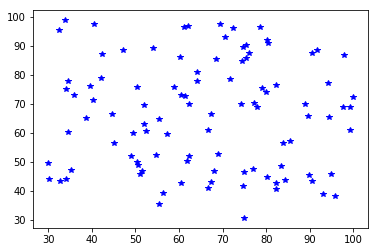

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',', dtype=float)
pl.plot(data[:,0], data[:,1], '*b')

To find admitted and rejected student

In [3]:
#admitted students
dp = data[data[:,2]==1,0:2]
#rejected students
dn = data[data[:,2]==0,0:2]

Plot admitted and rejected student with different colors

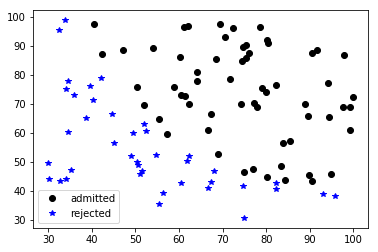

In [4]:
pl.plot(dp[:,0], dp[:,1], 'ko', label='admitted')
pl.plot(dn[:,0], dn[:,1], 'b*', label='rejected')
pl.legend()

In [5]:
def sigmoid(x):
    """Calculate sigmoid function of input paramter.
    input:
    ------
    x: float
    
    return:
    -------
    aux: float
    """
    if x == 0:
        aux=0.5
    else:
        aux = 1./( 1+np.exp(-x) )
        
    return aux
# to be applicable to an array, vectorize it 
sigmoid = np.vectorize(sigmoid)

In [6]:
def costFun(x,y,theta):
    """Calculate the cost function in logistic regression.
    input:
    ------
    x: array, float, features
    y: array, float, targets
    theta: array, float, hypothesis parameter
    
    return:
    -------
    float, the cost 
    """
    aux = 0
    M = x.shape[0]
    aux = np.sum(-y*np.log(sigmoid(np.dot(x,theta))) - \
               (1-y)*np.log(1-sigmoid(np.dot(x,theta))))
    return aux/M

In [7]:
def costGrad(x,y,theta):
    """Gradient of the logistic regression cost function.
    input:
    ------
    x: array, float, features
    y: array, float, target
    theta: array, hypothesis paramters
    
    return:
    -------
    grad: array, float, dimension of features
    """
    M = x.shape[0]
    grad = np.zeros((x.shape[1]),float)
    temp = sigmoid(np.dot(theta,x.T))
    error = temp - y
    grad = (1./M)*np.dot(x.T,error)
    return grad

In [8]:
def g_des(x,y,theta_int,alpha):
    """Gradient desendent to find the minimum of the cost function.
    input:
    ------
    x: array, float, features
    y: array, float, target
    theta_int: array, hypothesis paramters, initial guess.
    
    return:
    -------
    theta:array, hypothesis parameters, fitted
    Jarr: array, cost function in each iteration
    """
    num_itr = 5000
    Jarr = np.zeros((num_itr), float)
    theta = theta_int
    print(Jarr.shape)
    for it in range(num_itr):
        theta -= alpha*costGrad(x,y,theta)
        Jarr[it] = costFun(x,y,theta)
    return theta, Jarr

In [9]:
#x = data[:,0:2]
#m = x.shape[0]
# add one column of 1s to the featurs for theta_0
#x = np.hstack((np.ones((m,1), float),x))
#y = data[:,2]
#theta_int = np.array([-10, 0.1,0.1])
#theta_f, J_arr = g_des(x,y,theta_int,0.001)
#print(theta_f)
#print(sigmoid(np.dot(theta_f,np.array([1,45,85],float))))
#d1 = np.linspace(0,1,5000)
#pl.plot(d1,J_arr, 'k,')

In [10]:
from scipy.optimize import minimize
# define one-paramter cost function for optimization
def cost_1param(theta):
    """one parameter cost function for optimization"""
    x = data[:,0:2]
    m = x.shape[0]
    x1 = np.ones((m,1),float)
    x = np.hstack((x1,x))
    y = data[:,2]
    return costFun(x,y,theta)

#optimization using "minimize" from scipy
x0 = 0.1*np.ones((3), float)
res = minimize(cost_1param,x0)
print(res)
print(res.x)
#prediction for test of (45,85) = 0.776
sigmoid(np.dot(res.x,np.array([1,45,85])))

      fun: 0.20349770159138283
 hess_inv: array([[  3.28080834e+03,  -2.61365970e+01,  -2.66365060e+01],
       [ -2.61365970e+01,   2.22597830e-01,   1.99170006e-01],
       [ -2.66365060e+01,   1.99170006e-01,   2.32077088e-01]])
      jac: array([  2.04890966e-08,   1.25542283e-06,   4.73111868e-07])
  message: 'Optimization terminated successfully.'
     nfev: 155
      nit: 26
     njev: 31
   status: 0
  success: True
        x: array([-25.16121944,   0.20623081,   0.20147066])
[-25.16121944   0.20623081   0.20147066]


array(0.7762896205867869)

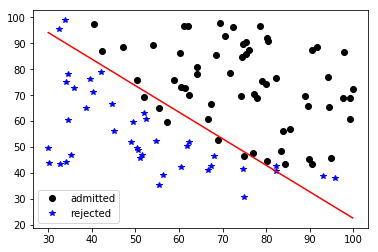

In [11]:
x = data[:,0:2]
y = data[:,2]
theta = res.x
x_pos = x[y==1,:]
x_neg = x[y==0,:]
pl.plot(x_pos[:,0], x_pos[:,1], 'ko', label='admitted')
pl.plot(x_neg[:,0], x_neg[:,1], 'b*', label='rejected')
pl.legend()
x1_fit = np.linspace(min(x[:,0]), max(x[:,0]),100)
x2_fit = (-1./theta[2])* (theta[1]*x1_fit + theta[0])
pl.plot(x1_fit,x2_fit, 'r-')